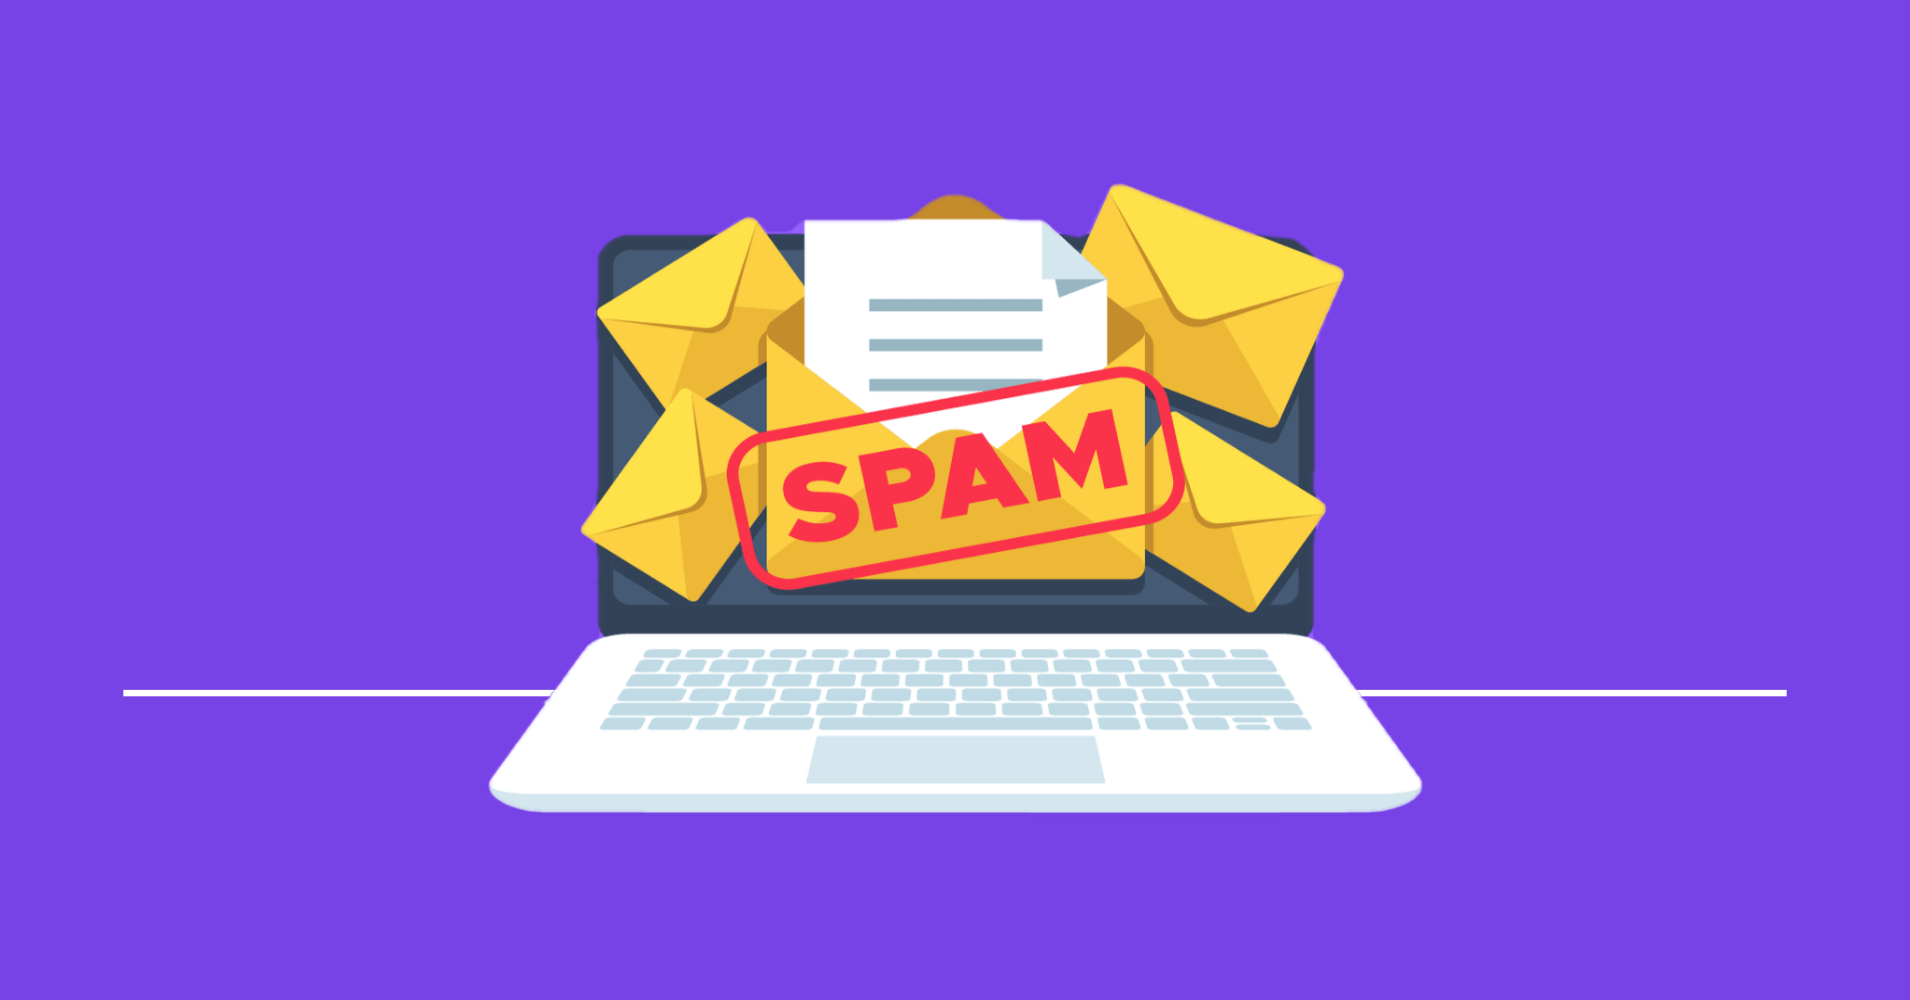

# **Importing Necessary Dependencies**

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, f1_score
pd.set_option("display.max_columns",None)
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **EDA**

In [48]:
df = pd.read_csv("/kaggle/input/spam-email-classification/email.csv")
df.shape

(5573, 2)

In [49]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [51]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [52]:
df['Category'].value_counts()

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [53]:
df.drop(df[df['Category']=='{"mode":"full"'].index,axis = 0,inplace = True)

<Axes: xlabel='Category', ylabel='count'>

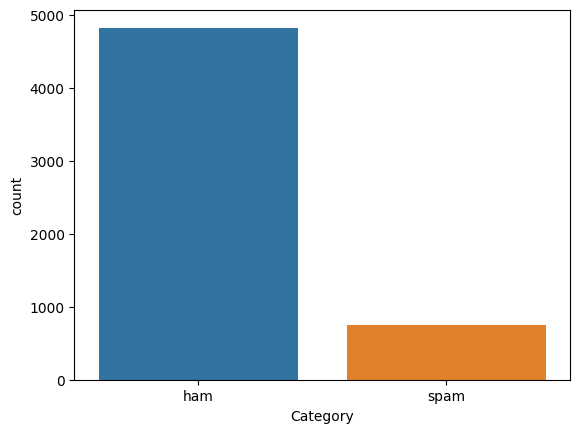

In [54]:
sns.countplot(x='Category',data=df)

# **Text Preprocessing**
* Lowercasing
* Spell Check
* Stopword Removal
* URL Remover
* Punctuation Removal
* WordCloud Visualization

In [55]:
df['Message'] = df['Message'].str.lower()
df.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [56]:
def spell_check(text):
    for char in text:
        textblb = TextBlob(char)
        textblb.correct().string
    return text

In [57]:
df['Message'] = df['Message'].apply(spell_check)
df.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [58]:
stopwords = stopwords.words('english')

In [59]:
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in stopwords:
            new_text.append(' ')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [60]:
df['Message'] = df['Message'].apply(remove_stopwords)
df.head()

,Category,Message
0,ham,"go jurong point, crazy.. available bugis..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry 2 wkly comp win fa cup final ...
3,ham,u dun say early hor... u c already say...
4,ham,"nah think goes usf, lives around t..."


In [61]:
import re
def remove_urls (vTEXT):
    vTEXT = re.sub('http://\S+|https://\S+', '', vTEXT)
    return(vTEXT)


In [62]:
df['Message'] = df['Message'].apply(remove_urls)
df.head()

,Category,Message
0,ham,"go jurong point, crazy.. available bugis..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry 2 wkly comp win fa cup final ...
3,ham,u dun say early hor... u c already say...
4,ham,"nah think goes usf, lives around t..."


In [63]:
import string
exclude = string.punctuation
def remove_punc(text):
    for char in exclude:
        text = text.replace(char," ")
    return text

In [64]:
df['Message'] = df['Message'].apply(remove_punc)
df.head()

,Category,Message
0,ham,go jurong point crazy available bugis...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final ...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around t...


In [65]:
import unicodedata
def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

In [66]:
df['Message'] = df['Message'].apply(strip_accents)
df.head()

,Category,Message
0,ham,go jurong point crazy available bugis...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final ...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around t...


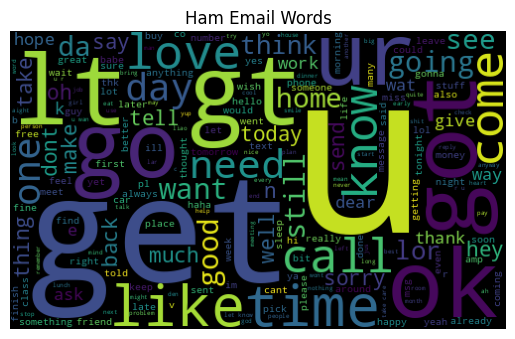

In [ ]:
words_list = df[df['Category']=='ham']['Message'].unique().tolist()
ham_words = " ".join(words_list)

wordcloud =  WordCloud(
                  width=500, height = 300,            
                  stopwords=stopwords).generate(ham_words)

plt.imshow(wordcloud)
plt.axis("off")
plt.title('Ham Email Words')
plt.show()

In [ ]:
words_list = df[df['Category']=='spam']['Message'].unique().tolist()
spam_words = " ".join(words_list)

wordcloud =  WordCloud(
                  width=500, height = 300,            
                  stopwords=stopwords).generate(spam_words)

plt.imshow(wordcloud)
plt.axis("off")
plt.title('Spam Email Words')
plt.show()

# **Tokenization and Stemming**

In [69]:
def tokenize(text):
     return word_tokenize(text)
    
df['Message'] = df['Message'].apply(tokenize)
df.head()

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"


In [70]:
ps = PorterStemmer()

def stemming(text):
    return " ".join([ps.stem(word) for word in text])

In [71]:
df['Message'] = df['Message'].apply(stemming)
df.head()

,Category,Message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


# **Train Test Split & Model Testing**

In [81]:
X = df['Message'].values
y = df['Category'].values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
  X,y,test_size=0.25)

In [138]:
clf1 =Pipeline( [('vectorize',TfidfVectorizer()),   
                      ('RandomForestClf', RandomForestClassifier())] )
clf2 =Pipeline( [('vectorize1',CountVectorizer()),   
                      ('Multinomial_NB', MultinomialNB())] )
clf3 =Pipeline( [('vectorize2',CountVectorizer()),   
                      ('LogReg', LogisticRegression())] )
clf4 =Pipeline( [('vectorize4',CountVectorizer()),   
                      ('SVM', SVC())] )
clf5 =Pipeline( [('vectorize5',CountVectorizer(ngram_range=(2,2))),   
                      ('Multinomial_NB2', MultinomialNB())] )

In [139]:
pipelines = [clf1,clf2,clf3,clf4,clf5]
for pipe in pipelines:
    pipe.fit(X_train,y_train)

# **Model Evaluation and Prediction**

In [141]:
pipe_dict = { 0: 'Random Forest',1: 'Multinomial Naive Bayes (with BagOfWords)', 2 : 'Logistic Regression', 3 : 'Support Vector Machine (SVM)', 4: 'Multinomial NB (with Bi-gram)'}

for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Random Forest Test Accuracy: 0.9784637473079684
Multinomial Naive Bayes (with BagOfWords) Test Accuracy: 0.9870782483847811
Logistic Regression Test Accuracy: 0.9849246231155779
Support Vector Machine (SVM) Test Accuracy: 0.9813352476669059
Multinomial NB (with Bi-gram) Test Accuracy: 0.9777458722182341


In [142]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy : {}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy : Multinomial Naive Bayes (with BagOfWords)


In [145]:
email = [
    "How are you my Baby?",
     "Photography 4 Humanity Global Prize Competition 2024| Win Cash Prizes of Rs. 4 L+ by the UN Human Rights Council",
    "Free Iphone in your account!! Sign in now.",
    "You have won a TV in lucky draw. Join to know more."
]

In [147]:
print("Predicted outcome : ",clf2.predict(email))

Predicted outcome :  ['ham' 'spam' 'spam' 'spam']


In [ ]:
import pickle 

In [ ]:
pickle.dump(clf2, open('Email_Classifier_NB_model.pkl','wb'))